In [3]:
import pandas as pd
import re
import unidecode
import bs4 as bs
import requests
import os
import tweepy
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [4]:
periodic_data = pd.read_csv("periodic.csv")

In [5]:
periodic_data

,AtomicNumber,Element,Symbol,AtomicMass,NumberofNeutrons,NumberofProtons,NumberofElectrons,Period,Group,Phase,...,FirstIonization,Density,MeltingPoint,BoilingPoint,NumberOfIsotopes,Discoverer,Year,SpecificHeat,NumberofShells,NumberofValence
0,1,Hydrogen,H,1.007,0,1,1,1,1.0,gas,...,13.5984,0.000090,14.175,20.28,3.0,Cavendish,1766.0,14.304,1,1.0
1,2,Helium,He,4.002,2,2,2,1,18.0,gas,...,24.5874,0.000179,NaN,4.22,5.0,Janssen,1868.0,5.193,1,NaN
2,3,Lithium,Li,6.941,4,3,3,2,1.0,solid,...,5.3917,0.534000,453.850,1615.00,5.0,Arfvedson,1817.0,3.582,2,1.0
3,4,Beryllium,Be,9.012,5,4,4,2,2.0,solid,...,9.3227,1.850000,1560.150,2742.00,6.0,Vaulquelin,1798.0,1.825,2,2.0
4,5,Boron,B,10.811,6,5,5,2,13.0,solid,...,8.2980,2.340000,2573.150,4200.00,6.0,Gay-Lussac,1808.0,1.026,2,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,114,Flerovium,Fl,289.000,175,114,114,7,14.0,artificial,...,NaN,NaN,NaN,NaN,NaN,NaN,1999.0,NaN,7,4.0
114,115,Moscovium,Mc,288.000,173,115,115,7,15.0,artificial,...,NaN,NaN,NaN,NaN,NaN,NaN,2010.0,NaN,7,5.0
115,116,Livermorium,Lv,292.000,176,116,116,7,16.0,artificial,...,NaN,NaN,NaN,NaN,NaN,NaN,2000.0,NaN,7,6.0
116,117,Tennessine,Ts,295.000,178,117,117,7,17.0,artificial,...,NaN,NaN,NaN,NaN,NaN,NaN,2010.0,NaN,7,7.0


In [6]:
symbols = periodic_data["Symbol"].to_numpy()
symbols = [symbol.strip() for symbol in symbols]
names = periodic_data["Element"].to_numpy()
names = [name.strip().lower() for name in names]

In [7]:
def starts_with(string, start):
    return bool(re.match(start, string, re.I))

In [8]:
def encrypt(original_in, symbols):
    unidecoded_in = unidecode.unidecode(original_in)
    original_in = unidecoded_in if len(unidecoded_in) == len(original_in) else original_in
    res = encrypt_r(original_in, original_in, [], symbols)
    return res if len("".join(res)) == len(original_in) else None

def encrypt_r(original_in, remainder, res, symbols):
    if len(remainder) == 0:
        return res
    else:
        if not remainder[0].isalpha():
            new_remainder = remainder[1:]
            res = encrypt_r(original_in, new_remainder, res+[remainder[0]], symbols)
        else:
            res_temp = res
            for symbol in symbols:
                if starts_with(remainder, symbol):
                    new_remainder = remainder[len(symbol):]
                    res = encrypt_r(original_in, new_remainder, res_temp+[symbol], symbols)
                    if "".join(res).lower() == original_in.lower():
                        break

    return res

In [9]:
input_str = "fïre is fun"
print(encrypt(input_str, symbols))

['F', 'I', 'Re', ' ', 'I', 'S', ' ', 'F', 'U', 'N']


In [10]:
def update_word_list():
    alphabet = "abcdefghijklmnopqrstuvwxyz"
    f=open("words.txt", "w")
    for char in alphabet:
        print(char, end="")
        end_reached = False
        i=1
        while not end_reached:
            source = requests.get(f"https://dictionnaire.lerobert.com/explore/def/{char}/{str(i)}")
            soup = bs.BeautifulSoup(source.content, "html.parser")
            words = soup.select(".l-l")[0]
            res_words = words.find_all("a")
            if len(res_words) != 0:
                for word in res_words:
                    f.write("%s\n" % word.text)
            else:
                end_reached = True
            i += 1


In [11]:
def get_words_from_file(filename):
    f = open(filename, "r")
    content = f.read()
    return content.split("\n")[:-1]

In [12]:
all_words = get_words_from_file("words.txt")

In [13]:
len(all_words)

49766

In [14]:
crypt_words = []
for idx, word in enumerate(all_words):
    crypt = encrypt(word, symbols)
    if crypt is not None:
        print(f"{idx}/{len(all_words)}")
        crypt_words.append(crypt)

218/49766
228/49766
246/49766
249/49766
250/49766
252/49766
253/49766
255/49766
257/49766
259/49766
261/49766
262/49766
273/49766
274/49766
275/49766
280/49766
304/49766
306/49766
314/49766
333/49766
334/49766
335/49766
336/49766
338/49766
341/49766
343/49766
358/49766
359/49766
360/49766
361/49766
362/49766
367/49766
368/49766
370/49766
373/49766
398/49766
399/49766
400/49766
402/49766
403/49766
413/49766
414/49766
419/49766
427/49766
442/49766
444/49766
446/49766
448/49766
454/49766
455/49766
456/49766
458/49766
460/49766
461/49766
476/49766
477/49766
502/49766
506/49766
507/49766
513/49766
519/49766
521/49766
523/49766
524/49766
526/49766
529/49766
531/49766
534/49766
535/49766
544/49766
916/49766
920/49766
925/49766
926/49766
957/49766
958/49766
959/49766
962/49766
967/49766
968/49766
971/49766
972/49766
973/49766
975/49766
976/49766
980/49766
988/49766
990/49766
991/49766
992/49766
993/49766
995/49766
997/49766
998/49766
1000/49766
1003/49766
1011/49766
1012/49766
1014/49766
1015/

In [15]:
auth = tweepy.OAuth1UserHandler(
    consumer_key = "RRcyhAcGk9ma2GKRVRX8FVXLG",
    consumer_secret = "ugvpensFn6PZDltJcowrcvuyMvNUtiwFWCEhFUlFPui3D2sSiF",
    access_token = "1543498760810029070-8729fwj7Ksgd3cLUQgsYBDQXLOumak",
    access_token_secret = "AnzBNb2FKUrsa4lLz8o2fXLCXMHsDC2kILdJmfdLHQDsC"
)

In [16]:
api = tweepy.API(auth)

In [17]:
api.update_status("hello world")

Status(_api=<tweepy.api.API object at 0x7fb6754a8670>, _json={'created_at': 'Sat Jul 09 18:38:35 +0000 2022', 'id': 1545839852696092678, 'id_str': '1545839852696092678', 'text': 'hello world', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []}, 'source': '<a href="https://example.org" rel="nofollow">PerioDico Bot</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1543498760810029070, 'id_str': '1543498760810029070', 'name': 'PerioDico Bot', 'screen_name': 'PerioDicoBot', 'location': '', 'description': 'PLaISIr VOCaBULaIRe', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 0, 'friends_count': 0, 'listed_count': 0, 'created_at': 'Sun Jul 03 07:36:10 +0000 2022', 'favourites_count': 0, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': False, 'stat

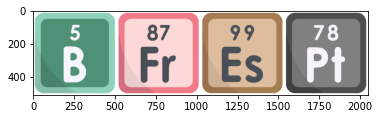

In [18]:
ims = []
for filename in os.listdir("IMG")[:4]:
    im = cv2.imread("IMG/"+filename)
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    im[im==0] = 255
    ims.append(im)
    
res = np.concatenate(ims, axis=1)
plt.imshow(res)

In [27]:
cr = encrypt("fire is fun", symbols)

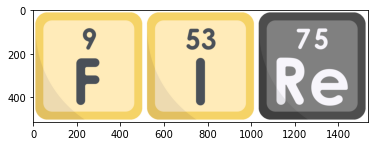

In [20]:
ims = []
for symbol in cr:
    im = cv2.imread("IMG/"+symbol+".png")
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    im[im==0] = 255
    ims.append(im)

res = np.concatenate(ims, axis=1)
plt.imshow(res)

In [21]:
cv2.imwrite("res.png", res)

True

In [75]:
def crypt_to_image(crypt):
    ims = []
    for symbol in crypt:
        if not symbol.isspace():
            im = cv2.imread("IMG/"+symbol+".png") 
            #im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
            im[im==0] = 255
            ims.append(im)
        else: 
            ims.append(np.full((512,256,3),255))
            

    res = np.concatenate(ims, axis=1)
    return res

In [76]:
res = crypt_to_image(cr)

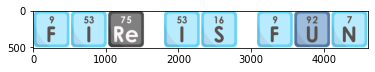

In [77]:
plt.imshow(res)

In [78]:
cv2.imwrite("res.png", crypt_to_image(cr))

True